In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import numpy as np
import statsmodels.api as sm

def lin_reg(y):
    X = np.linspace(0, 1, len(y))
    X = sm.add_constant(X)
    return sm.OLS(y, X).fit()

In [58]:
import numpy as np

from scipy.stats import linregress

def plot_histogram(text, bins=10, w=4, h=2):
    
    author = '{} {}'.format(text.get('authorFirst'), text.get('authorLast'))
    print('{} ({}, {})'.format(text['title'], author, text['year']))
    
    plt.figure(figsize=(w,h))
    
    y, _, _ = plt.hist(text['offsets'], bins, (0,1))
    
    fit = lin_reg(y)
    
    slope = fit.params[1]
    p = fit.pvalues[1]
    print(slope, p)
    
    x1 = 0
    x2 = 1
    y1 = fit.predict()[0]
    y2 = fit.predict()[-1]
    
    plt.plot([x1, x2], [y1, y2])
    plt.show()

In [59]:
from lint_analysis.token_offsets import Dataset

ds = Dataset.from_local('had.json')

texts = ds.texts()

Saratoga trunk (Edna Ferber, 1941)
-48.3272727273 0.0535943215865


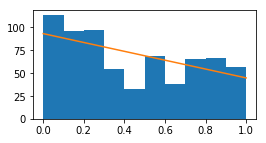

In this our life (Ellen Anderson Gholson Glasgow, 1941)
-136.090909091 0.0164125180558


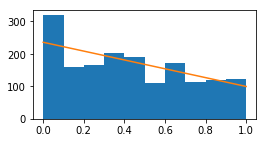

Green centuries (Caroline Gordon, 1941)
17.8909090909 0.610002000091


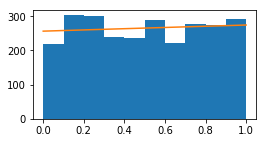

The mutineers (Charles Boardman Hawes, 1941)
9.65454545455 0.404155212522


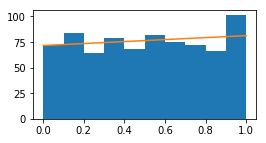

Star spangled summer (Janet Lambert, 1941)
-7.2 0.194635858487


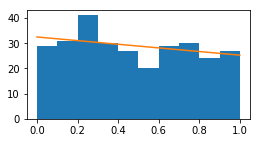

The wife of Martin Guerre (Janet Lewis, 1941)
14.4 0.439994664267


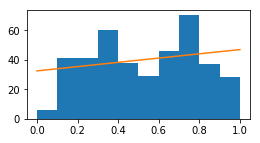

The deadly truth (Helen McCloy, 1941)
40.2 0.0258871946465


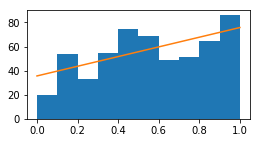

The metal monster (Abraham Merritt, 1941)
-11.7818181818 0.547256711674


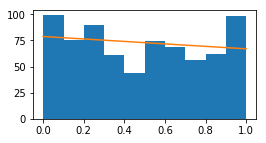

The harp and the blade (John Myers Myers, 1941)
-3.49090909091 0.771693208964


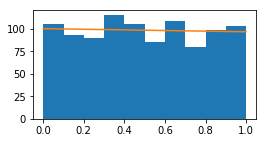

The puzzle of the happy hooligan (Stuart Palmer, 1941)
6.21818181818 0.612893508032


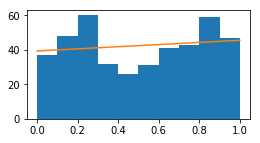

In [60]:
from itertools import islice

data = []
for text in islice(ds.texts(), 10):
    plot_histogram(text)

In [33]:
from scipy.stats import histogram

data = []
for text in ds.texts():
    
    y, _, _, _ = histogram(text['offsets'], 50, (0, 1))
    fit = lin_reg(y)
    
    slope = fit.params[1]
    p = fit.pvalues[1]
    
    data.append((text['year'], slope, p, text))

In [52]:
import pandas as pd

df = pd.DataFrame(data, columns=('year', 'slope', 'p', 'text'))

p01 = df[df['p'] < 0.01]

In [53]:
len(p01)

2586

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  slope   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.756
Date:                Thu, 27 Apr 2017   Prob (F-statistic):             0.0527
Time:                        14:23:50   Log-Likelihood:                -10166.
No. Observations:                2586   AIC:                         2.033e+04
Df Residuals:                    2585   BIC:                         2.034e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0002      0.000      1.938      0.053   -2.88e-06       0.000
==============================================================================
Omnibus:                      305.868   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1338.615
Skew:                          -0.498   Prob(JB):                    2.11e-291
Kurtosis:                       6.381   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

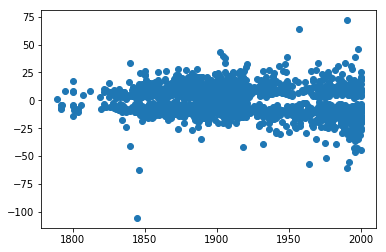

In [57]:
X = p01['year']
y = p01['slope']

# X = sm.add_constant(X)
fit = sm.OLS(y, X).fit()

plt.scatter(X, y)
fit.summary()